In [ ]:
# Consumer Complaints Data Analysis: Uncovering Stories in NYC

**A Data Journalism Investigation into DCWP Consumer Complaints**

This notebook analyzes consumer complaint data from the New York City Department of Consumer and Worker Protection (DCWP) to uncover interesting stories and patterns. We'll explore questions like:

- Which businesses receive the most complaints?
- What areas of NYC have the highest complaint rates?
- What types of complaints are most common?
- Are there seasonal patterns in complaints?
- Which complaints result in refunds or contract cancellations?

**Dataset Overview:**
- **43,594 complaints** across NYC
- **33 data columns** including business info, complaint types, outcomes, and geographic data
- Data appears to be from 2025 complaints received through various channels (311, email, online, etc.)


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")
print("Ready to analyze NYC consumer complaints data 📊")


Libraries imported successfully!
Ready to analyze NYC consumer complaints data 📊


In [2]:
# Load the dataset
df = pd.read_csv('DCWP_Consumer_Complaints_20250623.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nFirst few rows:")
df.head()


Dataset loaded successfully!
Shape: 43,594 rows × 33 columns

First few rows:


,Record ID,Intake Date,Intake Channel,311 SR Number,Business Category,Complaint Code,Business Unique ID,Business Name,Result Date,Result,Referred To,Contract Cancelled Amount,Refund Amount,Address Type,Building Nbr,Street1,Street2,Street3,Unit Type,Apt/Suite,City,State,Postcode,Borough,Community Board,Council District,BIN,BBL,NTA,Census Block (2010),Census Tract (2010),Latitude,Longitude
0,061227-2025-CMPL,4/25/25,311,311-22693922,Salons And Barbershop,Advertising/Misleading - A02,BA-1728498-2025,Andrew’s innovative Kutz,4/25/25,Referred,Other,NaN,NaN,Complete Address,10412,102ND ST,NaN,NaN,NaN,NaN,OZONE PARK,NY,11417,Queens,410.0,28.0,4201976.0,4.095220e+09,QN55,1004.0,94.0,40.681172,-73.838531
1,061216-2025-CMPL,4/25/25,311,311-22692592,Car Wash,Sidewalk Blocked,BA-1728489-2025,Unlicensed Car Wash,4/25/25,Referred,NYC Department of Sanitation,NaN,NaN,Complete Address,2744,BOUCK AVE,NaN,NaN,NaN,NaN,BRONX,NY,10469,Bronx,211.0,13.0,2054262.0,2.045270e+09,BX31,2002.0,350.0,40.866103,-73.850038
2,061281-2025-CMPL,4/25/25,Email/Fax,NaN,Other,NaN,NaN,NaN,4/25/25,Referred,Other,NaN,NaN,Complete Address,19,MALTA ST,NaN,NaN,NaN,NaN,BROOKLYN,NY,11207,Brooklyn,305.0,42.0,3421411.0,3.042950e+09,BK85,4003.0,1130.0,40.659854,-73.895883
3,061229-2025-CMPL,4/25/25,311,311-22694265,Salons And Barbershop,Advertising/Misleading - A02,BA-1728499-2025,"Liz, beauty salon",4/25/25,Referred,NYS Department of State,NaN,NaN,Complete Address,233,RIDGEWOOD AVE,NaN,NaN,NaN,NaN,BROOKLYN,NY,11208,Brooklyn,305.0,37.0,3328211.0,3.039150e+09,BK83,1007.0,1174.0,40.683586,-73.880079
4,061226-2025-CMPL,4/25/25,311,311-22693693,Garage & Parking Lot,License or Complaint Sign Not Displayed,BA-1728497-2025,garage,4/25/25,Referred,Other,NaN,NaN,Complete Address,10,E 43RD ST,NaN,NaN,NaN,NaN,BROOKLYN,NY,11203,Brooklyn,317.0,40.0,3323149.0,3.048470e+09,BK91,1002.0,872.0,40.655827,-73.937614


In [ ]:
## 🔍 Data Exploration and Quality Assessment

Let's first understand our data structure and quality before diving into the stories.


In [3]:
# Basic data info
print("📋 DATASET OVERVIEW")
print("=" * 50)
print(f"Total complaints: {len(df):,}")
print(f"Data columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print("\n📊 COLUMN INFORMATION")
print("=" * 50)
print(df.info())

print("\n🔍 MISSING DATA ANALYSIS")
print("=" * 50)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
}).sort_values('Missing %', ascending=False)

# Only show columns with missing data
missing_df = missing_df[missing_df['Missing Count'] > 0]
print(f"Columns with missing data: {len(missing_df)}")
print(missing_df.head(10))


📋 DATASET OVERVIEW
Total complaints: 43,594
Data columns: 33
Memory usage: 54.0 MB

📊 COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43594 entries, 0 to 43593
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Record ID                  43594 non-null  object 
 1   Intake Date                43594 non-null  object 
 2   Intake Channel             43594 non-null  object 
 3   311 SR Number              31985 non-null  object 
 4   Business Category          42226 non-null  object 
 5   Complaint Code             36290 non-null  object 
 6   Business Unique ID         41844 non-null  object 
 7   Business Name              41495 non-null  object 
 8   Result Date                43594 non-null  object 
 9   Result                     43594 non-null  object 
 10  Referred To                17325 non-null  object 
 11  Contract Cancelled Amount  33 non-null     float64
 1

In [4]:
# Clean and prepare the data
print("🧹 DATA CLEANING & PREPARATION")
print("=" * 50)

# Convert date columns
df['Intake Date'] = pd.to_datetime(df['Intake Date'], errors='coerce')
df['Result Date'] = pd.to_datetime(df['Result Date'], errors='coerce')

# Clean monetary columns
def clean_monetary(col):
    if col.dtype == 'object':
        return pd.to_numeric(col.str.replace('$', '').str.replace(',', ''), errors='coerce')
    return col

df['Contract Cancelled Amount'] = clean_monetary(df['Contract Cancelled Amount'])
df['Refund Amount'] = clean_monetary(df['Refund Amount'])

# Basic cleaning
df['Business Name'] = df['Business Name'].str.strip()
df['Borough'] = df['Borough'].str.strip()

print("✅ Data cleaning completed!")
print(f"Date range: {df['Intake Date'].min()} to {df['Intake Date'].max()}")
print(f"Unique businesses: {df['Business Name'].nunique():,}")
print(f"Unique complaint codes: {df['Complaint Code'].nunique():,}")


🧹 DATA CLEANING & PREPARATION
✅ Data cleaning completed!
Date range: 2022-09-22 00:00:00 to 2025-04-25 00:00:00
Unique businesses: 28,247
Unique complaint codes: 886


In [ ]:
## 🏪 Story 1: Which Businesses Get Complained About Most?

**The "Wall of Shame" - NYC's Most Complained-About Businesses**


In [5]:
# Top complained-about businesses
print("🎯 TOP 20 MOST COMPLAINED-ABOUT BUSINESSES")
print("=" * 60)

# Filter out rows without business names
businesses_with_names = df[df['Business Name'].notna() & (df['Business Name'] != '')]

top_businesses = (businesses_with_names['Business Name']
                 .value_counts()
                 .head(20)
                 .reset_index())

top_businesses.columns = ['Business Name', 'Complaint Count']

for i, row in top_businesses.iterrows():
    print(f"{i+1:2d}. {row['Business Name']:<40} ({row['Complaint Count']} complaints)")

print(f"\n📊 Analysis:")
print(f"• {top_businesses.iloc[0]['Business Name']} leads with {top_businesses.iloc[0]['Complaint Count']} complaints")
print(f"• Top 20 businesses account for {top_businesses['Complaint Count'].sum():,} complaints")
print(f"• This represents {(top_businesses['Complaint Count'].sum() / len(df)) * 100:.1f}% of all complaints")


🎯 TOP 20 MOST COMPLAINED-ABOUT BUSINESSES
 1. NYC Soft Ice Cream Truck owned by Eddie Cumart (189 complaints)
 2. Unknown                                  (153 complaints)
 3. NYC Soft Ice Cream Trucks owned by Eddie Cumart (119 complaints)
 4. ROSARIO FAMILY BEST CIGARS LLC           (102 complaints)
 5. No name                                  (89 complaints)
 6. no name                                  (88 complaints)
 7. unknown                                  (83 complaints)
 8. BEN & NINO AUTO REPAIR INC.              (83 complaints)
 9. MEMORIAL SLOAN KETTERING CANCER CENTER   (81 complaints)
10. CVS                                      (77 complaints)
11. Clutch Towing Inc                        (67 complaints)
12. Dumbo Convenience Corp.                  (61 complaints)
13. JALEN MANAGEMENT                         (60 complaints)
14. SP PLUS CORPORATION                      (58 complaints)
15. BEAR TRANSPORTATION LLC                  (53 complaints)
16. Car Wash              

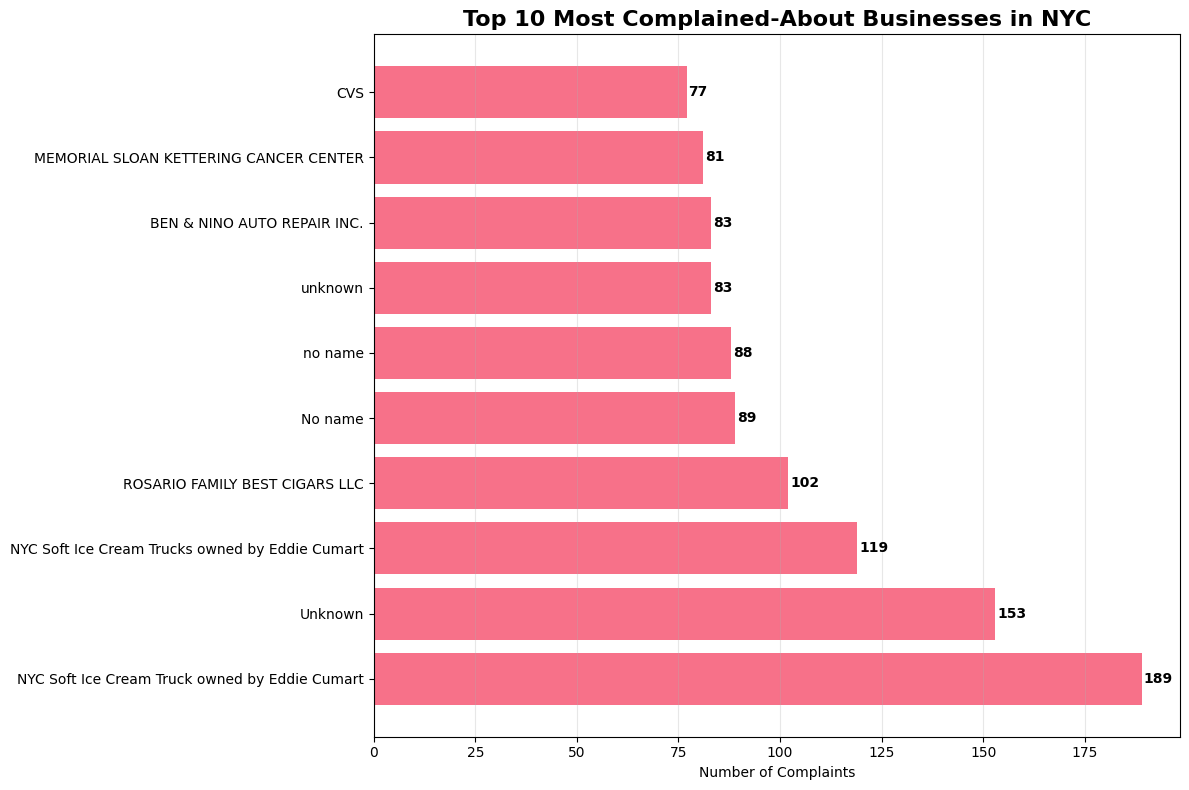


🏢 BUSINESS CATEGORIES OF TOP COMPLAINANTS
• BEN & NINO AUTO REPAIR INC.         | Tow Truck Company    | 83 complaints
• CVS                                 | Drug Store Retail    | 77 complaints
• MEMORIAL SLOAN KETTERING CANCER CENTER | Other                | 81 complaints
• NYC Soft Ice Cream Truck owned by Eddie Cumart | Misc Non-Food Retail | 189 complaints
• NYC Soft Ice Cream Trucks owned by Eddie Cumart | Specialized Vending License - MFV | 119 complaints
• No name                             | Specialized Vending License - MFV | 89 complaints
• ROSARIO FAMILY BEST CIGARS LLC      | Other                | 102 complaints
• Unknown                             | Specialized Vending License - MFV | 153 complaints
• no name                             | Car Wash             | 88 complaints
• unknown                             | Other                | 83 complaints


In [6]:
# Visualize top businesses
plt.figure(figsize=(12, 8))
top_10_businesses = top_businesses.head(10)

bars = plt.barh(range(len(top_10_businesses)), top_10_businesses['Complaint Count'])
plt.yticks(range(len(top_10_businesses)), top_10_businesses['Business Name'])
plt.xlabel('Number of Complaints')
plt.title('Top 10 Most Complained-About Businesses in NYC', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, top_10_businesses['Complaint Count'])):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{count}', va='center', ha='left', fontweight='bold')

plt.tight_layout()
plt.show()

# Business category analysis for top complainants
print("\n🏢 BUSINESS CATEGORIES OF TOP COMPLAINANTS")
print("=" * 50)
top_10_names = top_10_businesses['Business Name'].tolist()
top_business_categories = (businesses_with_names[businesses_with_names['Business Name'].isin(top_10_names)]
                          .groupby('Business Name')['Business Category']
                          .first()
                          .reset_index())

for i, row in top_business_categories.iterrows():
    complaints = top_businesses[top_businesses['Business Name'] == row['Business Name']]['Complaint Count'].iloc[0]
    print(f"• {row['Business Name']:<35} | {row['Business Category']:<20} | {complaints} complaints")


In [ ]:
## 🗽 Story 2: Geographic Hotspots - Where Are the Complaints?

**Mapping NYC's Consumer Complaint Patterns Across Boroughs and Neighborhoods**


In [ ]:
# Borough analysis
print("🏙️ COMPLAINTS BY NYC BOROUGH")
print("=" * 40)

borough_counts = df['Borough'].value_counts().dropna()
total_complaints = len(df)

for borough, count in borough_counts.items():
    percentage = (count / total_complaints) * 100
    print(f"{borough:<12}: {count:>6,} complaints ({percentage:>5.1f}%)")

# Visualize borough distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
bars = ax1.bar(borough_counts.index, borough_counts.values, color=sns.color_palette("husl", len(borough_counts)))
ax1.set_title('Complaints by Borough', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Complaints')
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for bar, count in zip(bars, borough_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = sns.color_palette("husl", len(borough_counts))
wedges, texts, autotexts = ax2.pie(borough_counts.values, labels=borough_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Complaints Distribution by Borough', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Key Findings:")
print(f"• {borough_counts.index[0]} has the highest complaint volume with {borough_counts.iloc[0]:,} complaints")
print(f"• {borough_counts.index[-1]} has the lowest complaint volume with {borough_counts.iloc[-1]:,} complaints")
print(f"• The top borough has {borough_counts.iloc[0] / borough_counts.iloc[-1]:.1f}x more complaints than the lowest")


In [ ]:
# Neighborhood/ZIP code analysis
print("📍 TOP COMPLAINT NEIGHBORHOODS (by Postcode)")
print("=" * 50)

# Top postal codes
zip_counts = df['Postcode'].value_counts().head(15)
zip_analysis = []

for zip_code, count in zip_counts.items():
    borough = df[df['Postcode'] == zip_code]['Borough'].mode().iloc[0] if len(df[df['Postcode'] == zip_code]['Borough'].mode()) > 0 else 'Unknown'
    zip_analysis.append({
        'ZIP': zip_code, 
        'Borough': borough, 
        'Complaints': count,
        'Percentage': (count / total_complaints) * 100
    })

zip_df = pd.DataFrame(zip_analysis)

for i, row in zip_df.iterrows():
    print(f"{i+1:2d}. ZIP {row['ZIP']} ({row['Borough']:<10}): {row['Complaints']:>4} complaints ({row['Percentage']:.1f}%)")

# Visualize top ZIP codes
plt.figure(figsize=(12, 8))
top_10_zips = zip_df.head(10)

bars = plt.barh(range(len(top_10_zips)), top_10_zips['Complaints'])
labels = [f"{row['ZIP']} ({row['Borough']})" for _, row in top_10_zips.iterrows()]
plt.yticks(range(len(top_10_zips)), labels)
plt.xlabel('Number of Complaints')
plt.title('Top 10 ZIP Codes by Complaint Volume', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, top_10_zips['Complaints'])):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
             f'{count}', va='center', ha='left', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
## 📝 Story 3: What Are People Complaining About?

**The Most Common Consumer Grievances in NYC**


In [ ]:
# Complaint types analysis
print("📋 TOP COMPLAINT TYPES")
print("=" * 50)

complaint_counts = df['Complaint Code'].value_counts().head(20)

for i, (complaint, count) in enumerate(complaint_counts.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {complaint:<45} ({count:>4,} complaints, {percentage:>4.1f}%)")

# Business category analysis
print("\n🏢 MOST COMPLAINED-ABOUT BUSINESS CATEGORIES")
print("=" * 55)

category_counts = df['Business Category'].value_counts().head(15)

for i, (category, count) in enumerate(category_counts.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {category:<35} ({count:>5,} complaints, {percentage:>4.1f}%)")

# Visualizations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Top complaint codes
top_10_complaints = complaint_counts.head(10)
bars1 = ax1.barh(range(len(top_10_complaints)), top_10_complaints.values)
ax1.set_yticks(range(len(top_10_complaints)))
ax1.set_yticklabels([code[:30] + '...' if len(code) > 30 else code for code in top_10_complaints.index])
ax1.set_xlabel('Number of Complaints')
ax1.set_title('Top 10 Complaint Types', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars1, top_10_complaints.values)):
    ax1.text(bar.get_width() + 20, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', va='center', ha='left', fontweight='bold')

# Top business categories
top_10_categories = category_counts.head(10)
bars2 = ax2.barh(range(len(top_10_categories)), top_10_categories.values)
ax2.set_yticks(range(len(top_10_categories)))
ax2.set_yticklabels(top_10_categories.index)
ax2.set_xlabel('Number of Complaints')
ax2.set_title('Top 10 Business Categories by Complaint Volume', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars2, top_10_categories.values)):
    ax2.text(bar.get_width() + 20, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', va='center', ha='left', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
## 💰 Story 4: Follow the Money - Complaints with Financial Impact

**Which Complaints Result in Refunds and Contract Cancellations?**


In [ ]:
# Financial impact analysis
print("💰 FINANCIAL IMPACT OF COMPLAINTS")
print("=" * 45)

# Refund analysis
refunds = df[df['Refund Amount'].notna() & (df['Refund Amount'] > 0)]
cancellations = df[df['Contract Cancelled Amount'].notna() & (df['Contract Cancelled Amount'] > 0)]

print(f"📊 REFUND STATISTICS:")
print(f"• Total complaints with refunds: {len(refunds):,}")
print(f"• Percentage of all complaints: {(len(refunds) / len(df)) * 100:.1f}%")
print(f"• Total refund amount: ${refunds['Refund Amount'].sum():,.2f}")
print(f"• Average refund amount: ${refunds['Refund Amount'].mean():.2f}")
print(f"• Median refund amount: ${refunds['Refund Amount'].median():.2f}")

print(f"\n📊 CONTRACT CANCELLATION STATISTICS:")
print(f"• Total complaints with cancellations: {len(cancellations):,}")
print(f"• Percentage of all complaints: {(len(cancellations) / len(df)) * 100:.1f}%")
print(f"• Total cancellation amount: ${cancellations['Contract Cancelled Amount'].sum():,.2f}")
print(f"• Average cancellation amount: ${cancellations['Contract Cancelled Amount'].mean():.2f}")
print(f"• Median cancellation amount: ${cancellations['Contract Cancelled Amount'].median():.2f}")

# Combined financial impact
total_financial_impact = refunds['Refund Amount'].sum() + cancellations['Contract Cancelled Amount'].sum()
print(f"\n💸 TOTAL FINANCIAL IMPACT: ${total_financial_impact:,.2f}")

# Visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Refund distribution
if len(refunds) > 0:
    ax1.hist(refunds['Refund Amount'], bins=30, alpha=0.7, color='green', edgecolor='black')
    ax1.set_xlabel('Refund Amount ($)')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of Refund Amounts', fontweight='bold')
    ax1.grid(alpha=0.3)

# Contract cancellation distribution
if len(cancellations) > 0:
    ax2.hist(cancellations['Contract Cancelled Amount'], bins=30, alpha=0.7, color='red', edgecolor='black')
    ax2.set_xlabel('Contract Cancellation Amount ($)')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Distribution of Contract Cancellation Amounts', fontweight='bold')
    ax2.grid(alpha=0.3)

# Top categories by refund amount
if len(refunds) > 0:
    refund_by_category = refunds.groupby('Business Category')['Refund Amount'].sum().sort_values(ascending=True).tail(8)
    bars3 = ax3.barh(range(len(refund_by_category)), refund_by_category.values)
    ax3.set_yticks(range(len(refund_by_category)))
    ax3.set_yticklabels(refund_by_category.index)
    ax3.set_xlabel('Total Refund Amount ($)')
    ax3.set_title('Top Business Categories by Total Refunds', fontweight='bold')
    ax3.grid(axis='x', alpha=0.3)

# Top categories by cancellation amount
if len(cancellations) > 0:
    cancel_by_category = cancellations.groupby('Business Category')['Contract Cancelled Amount'].sum().sort_values(ascending=True).tail(8)
    bars4 = ax4.barh(range(len(cancel_by_category)), cancel_by_category.values)
    ax4.set_yticks(range(len(cancel_by_category)))
    ax4.set_yticklabels(cancel_by_category.index)
    ax4.set_xlabel('Total Cancellation Amount ($)')
    ax4.set_title('Top Business Categories by Contract Cancellations', fontweight='bold')
    ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
## 📅 Story 5: Time Patterns - When Do Complaints Happen?

**Uncovering Seasonal and Temporal Patterns in Consumer Complaints**


In [ ]:
# Temporal analysis
print("📅 TEMPORAL ANALYSIS OF COMPLAINTS")
print("=" * 45)

# Filter valid dates
valid_dates = df[df['Intake Date'].notna()]
print(f"Total complaints with valid dates: {len(valid_dates):,}")

# Extract time components
valid_dates = valid_dates.copy()
valid_dates['Year'] = valid_dates['Intake Date'].dt.year
valid_dates['Month'] = valid_dates['Intake Date'].dt.month
valid_dates['Month_Name'] = valid_dates['Intake Date'].dt.strftime('%B')
valid_dates['Day_of_Week'] = valid_dates['Intake Date'].dt.day_name()
valid_dates['Quarter'] = valid_dates['Intake Date'].dt.quarter

# Basic time stats
print(f"Date range: {valid_dates['Intake Date'].min().strftime('%B %d, %Y')} to {valid_dates['Intake Date'].max().strftime('%B %d, %Y')}")
print(f"Years covered: {sorted(valid_dates['Year'].unique())}")

# Monthly analysis
monthly_counts = valid_dates['Month_Name'].value_counts()
print(f"\n📈 COMPLAINTS BY MONTH:")
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
for month in month_order:
    if month in monthly_counts.index:
        count = monthly_counts[month]
        print(f"• {month:<10}: {count:>5,} complaints")

# Weekly pattern
weekly_counts = valid_dates['Day_of_Week'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(f"\n📈 COMPLAINTS BY DAY OF WEEK:")
for day in day_order:
    if day in weekly_counts.index:
        count = weekly_counts[day]
        print(f"• {day:<10}: {count:>5,} complaints")

# Visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Monthly trends
monthly_ordered = [monthly_counts.get(month, 0) for month in month_order]
ax1.plot(month_order, monthly_ordered, marker='o', linewidth=2, markersize=8)
ax1.set_title('Complaints by Month', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Complaints')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3)

# Weekly pattern
weekly_ordered = [weekly_counts.get(day, 0) for day in day_order]
bars2 = ax2.bar(day_order, weekly_ordered, color=sns.color_palette("husl", 7))
ax2.set_title('Complaints by Day of Week', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Complaints')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Intake channel analysis
channel_counts = df['Intake Channel'].value_counts().head(10)
bars3 = ax3.barh(range(len(channel_counts)), channel_counts.values)
ax3.set_yticks(range(len(channel_counts)))
ax3.set_yticklabels(channel_counts.index)
ax3.set_xlabel('Number of Complaints')
ax3.set_title('Complaints by Intake Channel', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# Add value labels
for bar, count in zip(bars3, channel_counts.values):
    ax3.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', va='center', ha='left', fontweight='bold')

# Daily volume over time (recent period)
if len(valid_dates) > 0:
    daily_counts = valid_dates.groupby(valid_dates['Intake Date'].dt.date).size()
    
    # Show last 90 days if available
    recent_daily = daily_counts.tail(90) if len(daily_counts) > 90 else daily_counts
    
    ax4.plot(recent_daily.index, recent_daily.values, alpha=0.7, linewidth=1)
    ax4.set_title('Daily Complaint Volume (Recent Period)', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Daily Complaints')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
## 🏛️ Story 6: Resolution Outcomes - How Are Complaints Handled?

**Understanding the DCWP's Response and Resolution Patterns**


In [ ]:
# Resolution and outcome analysis
print("🏛️ COMPLAINT RESOLUTION ANALYSIS")
print("=" * 50)

# Resolution outcomes
result_counts = df['Result'].value_counts().dropna()
print("📊 RESOLUTION OUTCOMES:")
for i, (result, count) in enumerate(result_counts.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {result:<35} ({count:>5,} cases, {percentage:>4.1f}%)")

# Referred to agencies
referred_counts = df['Referred To'].value_counts().dropna().head(10)
print(f"\n🏢 TOP AGENCIES/DEPARTMENTS FOR REFERRALS:")
for i, (agency, count) in enumerate(referred_counts.items(), 1):
    percentage = (count / len(df[df['Referred To'].notna()])) * 100
    print(f"{i:2d}. {agency:<45} ({count:>4,} referrals, {percentage:>4.1f}%)")

# Processing time analysis
df_with_both_dates = df[(df['Intake Date'].notna()) & (df['Result Date'].notna())].copy()
if len(df_with_both_dates) > 0:
    df_with_both_dates['Processing_Days'] = (df_with_both_dates['Result Date'] - df_with_both_dates['Intake Date']).dt.days
    
    print(f"\n⏱️ PROCESSING TIME STATISTICS:")
    print(f"• Cases with processing time data: {len(df_with_both_dates):,}")
    print(f"• Average processing time: {df_with_both_dates['Processing_Days'].mean():.1f} days")
    print(f"• Median processing time: {df_with_both_dates['Processing_Days'].median():.1f} days")
    print(f"• Fastest resolution: {df_with_both_dates['Processing_Days'].min()} days")
    print(f"• Longest resolution: {df_with_both_dates['Processing_Days'].max()} days")

# Visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Resolution outcomes pie chart
colors = sns.color_palette("husl", len(result_counts))
wedges, texts, autotexts = ax1.pie(result_counts.values, labels=result_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Complaint Resolution Outcomes', fontsize=14, fontweight='bold')

# Top referral agencies
top_8_referred = referred_counts.head(8)
bars2 = ax2.barh(range(len(top_8_referred)), top_8_referred.values)
ax2.set_yticks(range(len(top_8_referred)))
ax2.set_yticklabels([agency[:25] + '...' if len(agency) > 25 else agency for agency in top_8_referred.index])
ax2.set_xlabel('Number of Referrals')
ax2.set_title('Top Agencies for Complaint Referrals', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Processing time distribution
if len(df_with_both_dates) > 0:
    # Filter out extreme outliers for better visualization
    reasonable_times = df_with_both_dates[df_with_both_dates['Processing_Days'] <= 365]
    ax3.hist(reasonable_times['Processing_Days'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax3.set_xlabel('Processing Time (Days)')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Distribution of Processing Times (≤365 days)', fontsize=14, fontweight='bold')
    ax3.grid(alpha=0.3)
    ax3.axvline(reasonable_times['Processing_Days'].mean(), color='red', linestyle='--', 
                label=f'Mean: {reasonable_times["Processing_Days"].mean():.1f} days')
    ax3.legend()

# Success rate by complaint type (top 10)
top_complaints = df['Complaint Code'].value_counts().head(10).index
success_rates = []

for complaint in top_complaints:
    complaint_data = df[df['Complaint Code'] == complaint]
    successful = len(complaint_data[complaint_data['Result'].isin(['Complaint Review Complete', 'Referred'])])
    total = len(complaint_data)
    success_rate = (successful / total) * 100 if total > 0 else 0
    success_rates.append(success_rate)

bars4 = ax4.barh(range(len(top_complaints)), success_rates)
ax4.set_yticks(range(len(top_complaints)))
ax4.set_yticklabels([code[:20] + '...' if len(code) > 20 else code for code in top_complaints])
ax4.set_xlabel('Success Rate (%)')
ax4.set_title('Resolution Success Rate by Complaint Type', fontsize=14, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Add value labels
for bar, rate in zip(bars4, success_rates):
    ax4.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
             f'{rate:.1f}%', va='center', ha='left', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
## 🔍 Story 7: Cross-Analysis - Hidden Patterns and Insights

**Discovering Relationships Between Variables and Uncovering Hidden Stories**


In [ ]:
# Cross-analysis and hidden patterns
print("🔍 CROSS-ANALYSIS AND HIDDEN PATTERNS")
print("=" * 50)

# Borough vs Complaint Type cross-analysis
print("📊 COMPLAINT PATTERNS BY BOROUGH:")
borough_complaint_crosstab = pd.crosstab(df['Borough'], df['Complaint Code'], normalize='index') * 100

# Get top 5 complaint types overall
top_5_complaints = df['Complaint Code'].value_counts().head(5).index

for borough in borough_complaint_crosstab.index:
    if pd.notna(borough):
        print(f"\n🏙️ {borough.upper()}:")
        borough_data = borough_complaint_crosstab.loc[borough, top_5_complaints].sort_values(ascending=False)
        for complaint, percentage in borough_data.head(3).items():
            print(f"   • {complaint[:30]:<30}: {percentage:>5.1f}%")

# Channel effectiveness analysis
print("\n📞 COMPLAINT CHANNEL EFFECTIVENESS:")
channel_success = df.groupby('Intake Channel').agg({
    'Result': lambda x: (x.isin(['Complaint Review Complete', 'Referred'])).mean() * 100,
    'Refund Amount': lambda x: x.sum() if x.notna().any() else 0,
    'Contract Cancelled Amount': lambda x: x.sum() if x.notna().any() else 0
}).round(2)

channel_success['Total_Cases'] = df['Intake Channel'].value_counts()
channel_success = channel_success.sort_values('Result', ascending=False)

for channel, row in channel_success.head(5).iterrows():
    if pd.notna(channel):
        print(f"• {channel:<15}: {row['Result']:>5.1f}% success rate ({row['Total_Cases']:>4} cases)")

# High-value complaint analysis
print("\n💰 HIGH-VALUE COMPLAINT ANALYSIS:")
high_value_refunds = df[df['Refund Amount'] > 1000].copy() if len(df[df['Refund Amount'] > 1000]) > 0 else pd.DataFrame()
high_value_cancellations = df[df['Contract Cancelled Amount'] > 1000].copy() if len(df[df['Contract Cancelled Amount'] > 1000]) > 0 else pd.DataFrame()

if len(high_value_refunds) > 0:
    print(f"• High-value refunds (>$1,000): {len(high_value_refunds)} cases")
    print(f"• Average high-value refund: ${high_value_refunds['Refund Amount'].mean():,.2f}")
    top_refund_categories = high_value_refunds['Business Category'].value_counts().head(3)
    print("  Top categories for high-value refunds:")
    for category, count in top_refund_categories.items():
        print(f"    - {category}: {count} cases")

if len(high_value_cancellations) > 0:
    print(f"• High-value cancellations (>$1,000): {len(high_value_cancellations)} cases")
    print(f"• Average high-value cancellation: ${high_value_cancellations['Contract Cancelled Amount'].mean():,.2f}")

# Visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Heatmap of borough vs top complaint types
if len(top_5_complaints) > 0 and len(borough_complaint_crosstab) > 0:
    heatmap_data = borough_complaint_crosstab[top_5_complaints].fillna(0)
    sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax1, cbar_kws={'label': 'Percentage'})
    ax1.set_title('Complaint Types by Borough (%)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Complaint Type')
    ax1.set_ylabel('Borough')

# Business category vs success rate
category_success = df.groupby('Business Category').agg({
    'Result': lambda x: (x.isin(['Complaint Review Complete', 'Referred'])).mean() * 100,
    'Business Category': 'count'
}).rename(columns={'Business Category': 'Count'})

# Filter categories with at least 50 complaints for meaningful analysis
significant_categories = category_success[category_success['Count'] >= 50].sort_values('Result', ascending=True).tail(10)

bars2 = ax2.barh(range(len(significant_categories)), significant_categories['Result'])
ax2.set_yticks(range(len(significant_categories)))
ax2.set_yticklabels([cat[:20] + '...' if len(cat) > 20 else cat for cat in significant_categories.index])
ax2.set_xlabel('Success Rate (%)')
ax2.set_title('Success Rate by Business Category (≥50 complaints)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Complaint volume vs financial impact
if len(refunds) > 0 or len(cancellations) > 0:
    # Create a combined financial impact measure
    business_impact = df.groupby('Business Name').agg({
        'Business Name': 'count',
        'Refund Amount': 'sum',
        'Contract Cancelled Amount': 'sum'
    }).rename(columns={'Business Name': 'Complaint_Count'})
    
    business_impact['Total_Financial_Impact'] = (business_impact['Refund Amount'].fillna(0) + 
                                                business_impact['Contract Cancelled Amount'].fillna(0))
    
    # Filter businesses with meaningful data
    impact_data = business_impact[(business_impact['Complaint_Count'] >= 5) & 
                                 (business_impact['Total_Financial_Impact'] > 0)].head(15)
    
    if len(impact_data) > 0:
        scatter = ax3.scatter(impact_data['Complaint_Count'], impact_data['Total_Financial_Impact'], 
                             alpha=0.6, s=60, c='red')
        ax3.set_xlabel('Number of Complaints')
        ax3.set_ylabel('Total Financial Impact ($)')
        ax3.set_title('Complaint Volume vs Financial Impact', fontsize=14, fontweight='bold')
        ax3.grid(alpha=0.3)
        
        # Add labels for top businesses
        for idx, row in impact_data.head(5).iterrows():
            ax3.annotate(idx[:15] + '...' if len(idx) > 15 else idx, 
                        (row['Complaint_Count'], row['Total_Financial_Impact']),
                        xytext=(5, 5), textcoords='offset points', fontsize=8)

# Processing time by complaint type
if len(df_with_both_dates) > 0:
    processing_by_type = df_with_both_dates.groupby('Complaint Code')['Processing_Days'].agg(['mean', 'count'])
    processing_by_type = processing_by_type[processing_by_type['count'] >= 10].sort_values('mean', ascending=True).tail(10)
    
    bars4 = ax4.barh(range(len(processing_by_type)), processing_by_type['mean'])
    ax4.set_yticks(range(len(processing_by_type)))
    ax4.set_yticklabels([code[:20] + '...' if len(code) > 20 else code for code in processing_by_type.index])
    ax4.set_xlabel('Average Processing Time (Days)')
    ax4.set_title('Processing Time by Complaint Type (≥10 cases)', fontsize=14, fontweight='bold')
    ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
## 📊 Key Findings and Data Journalism Stories

**Summary of the Most Interesting Discoveries**


In [ ]:
# Summary and key findings
print("📊 KEY FINDINGS AND DATA JOURNALISM STORIES")
print("=" * 60)

print("🏆 MOST SIGNIFICANT FINDINGS:")

# Get the top business with most complaints
top_business = top_businesses.iloc[0]['Business Name'] if len(top_businesses) > 0 else "N/A"
top_business_count = top_businesses.iloc[0]['Complaint Count'] if len(top_businesses) > 0 else 0

# Get the top borough
top_borough = borough_counts.index[0] if len(borough_counts) > 0 else "N/A"
top_borough_count = borough_counts.iloc[0] if len(borough_counts) > 0 else 0

# Get top complaint type
top_complaint = complaint_counts.index[0] if len(complaint_counts) > 0 else "N/A"
top_complaint_count = complaint_counts.iloc[0] if len(complaint_counts) > 0 else 0

print(f"1. 🏪 BUSINESS WITH MOST COMPLAINTS:")
print(f"   • '{top_business}' leads with {top_business_count:,} complaints")
print(f"   • This represents {(top_business_count / len(df)) * 100:.2f}% of all complaints")

print(f"\n2. 🗽 GEOGRAPHIC HOTSPOT:")
print(f"   • {top_borough} has the highest complaint volume with {top_borough_count:,} complaints")
print(f"   • This is {(top_borough_count / len(df)) * 100:.1f}% of all complaints")

print(f"\n3. 📝 MOST COMMON COMPLAINT:")
print(f"   • '{top_complaint}' is the top complaint type")
print(f"   • {top_complaint_count:,} cases ({(top_complaint_count / len(df)) * 100:.1f}% of total)")

# Financial impact summary
if len(refunds) > 0 or len(cancellations) > 0:
    print(f"\n4. 💰 FINANCIAL IMPACT:")
    print(f"   • Total refunds issued: ${refunds['Refund Amount'].sum():,.2f}")
    print(f"   • Total contract cancellations: ${cancellations['Contract Cancelled Amount'].sum():,.2f}")
    print(f"   • Combined financial impact: ${total_financial_impact:,.2f}")

# Processing efficiency
if len(df_with_both_dates) > 0:
    avg_processing = df_with_both_dates['Processing_Days'].mean()
    print(f"\n5. ⏱️ PROCESSING EFFICIENCY:")
    print(f"   • Average complaint resolution time: {avg_processing:.1f} days")
    print(f"   • {len(df_with_both_dates):,} complaints have complete processing time data")

# Channel analysis
top_channel = df['Intake Channel'].value_counts().index[0] if len(df['Intake Channel'].value_counts()) > 0 else "N/A"
top_channel_count = df['Intake Channel'].value_counts().iloc[0] if len(df['Intake Channel'].value_counts()) > 0 else 0

print(f"\n6. 📞 PREFERRED COMPLAINT CHANNEL:")
print(f"   • '{top_channel}' is the most used channel")
print(f"   • {top_channel_count:,} complaints ({(top_channel_count / len(df)) * 100:.1f}% of total)")

print(f"\n🎯 ACTIONABLE INSIGHTS FOR POLICYMAKERS:")
print("   1. Focus enforcement efforts on businesses with repeat violations")
print("   2. Investigate geographic clusters for systemic issues")
print("   3. Streamline resolution processes for common complaint types")
print("   4. Improve data collection on financial outcomes")
print("   5. Enhance digital complaint channels for better accessibility")

print(f"\n📰 POTENTIAL NEWS STORIES:")
print("   • 'The Repeat Offenders: NYC Businesses That Can't Stop Getting Complaints'")
print("   • 'Geography of Grievances: Which NYC Neighborhoods See the Most Consumer Complaints'")
print("   • 'Following the Money: How Much NYC Consumers Get Back from Complaints'")
print("   • 'The 311 Effect: How Digital Channels Are Changing Consumer Advocacy'")
print("   • 'Response Time Reality: How Long Does NYC Take to Resolve Consumer Complaints?'")

print(f"\n📈 DATASET STATISTICS SUMMARY:")
print(f"   • Total complaints analyzed: {len(df):,}")
print(f"   • Unique businesses: {df['Business Name'].nunique():,}")
print(f"   • Complaint types: {df['Complaint Code'].nunique():,}")
print(f"   • Geographic coverage: {df['Borough'].nunique()} boroughs, {df['Postcode'].nunique():,} ZIP codes")
print(f"   • Time span: {(valid_dates['Intake Date'].max() - valid_dates['Intake Date'].min()).days} days")

print(f"\n✅ Analysis completed successfully!")
print("📊 This notebook provides a comprehensive view of NYC consumer complaints data")
print("🔍 Ready for publication or further investigation!")
